##### Customer Churn Prediction

In [3]:
#importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pip install openpyxl

Note: you may need to restart the kernel to use updated packages.


In [5]:
#define path
file_path = r"D:\churn\prediction data.xlsx"
#define the sheet name to read the data from
sheet_name = 'vw_Churn_data'
data = pd.read_excel(file_path,sheet_name=sheet_name)


data


,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,False,Delhi,7,27,NaN,True,False,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,Others,Others
1,58353-MAH,Female,45,True,Maharashtra,14,13,NaN,True,True,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,Others,Others
2,25063-WES,Male,51,False,West Bengal,4,35,Deal 5,True,False,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,False,Karnataka,3,21,Deal 4,True,False,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,False,Tamil Nadu,3,8,NaN,True,False,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,43397-UTT,Female,41,False,Uttar Pradesh,6,33,NaN,True,True,...,Credit Card,74.400002,896.750000,0.000000,0,37.959999,934.710022,Churned,Competitor,Competitor made better offer
6003,22240-HAR,Male,51,True,Haryana,0,19,Deal 1,False,False,...,Credit Card,45.250000,3139.800049,0.000000,0,0.000000,3139.800049,Stayed,Others,Others
6004,78682-KER,Female,65,True,Kerala,14,25,NaN,True,True,...,Bank Withdrawal,74.949997,2869.850098,0.000000,0,599.640015,3469.489990,Churned,Dissatisfaction,Product dissatisfaction
6005,17816-ODI,Male,23,False,Odisha,2,10,NaN,True,True,...,Credit Card,70.150002,4480.700195,0.000000,0,2107.520020,6588.220215,Stayed,Others,Others


In [6]:
data['Phone_Service'] = data['Phone_Service'].replace({True:'Yes',False:'No'})
data['Multiple_Lines'] = data['Multiple_Lines'].replace({True:'Yes',False:'No'})
data['Internet_Service'] = data['Internet_Service'].replace({True:'Yes',False:'No'})
data['Married'] = data['Married'].replace({True:'Yes',False:'No'})


In [7]:
data.head()

,Customer_ID,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Value_Deal,Phone_Service,Multiple_Lines,...,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason
0,19877-DEL,Male,35,No,Delhi,7,27,NaN,Yes,No,...,Credit Card,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed,Others,Others
1,58353-MAH,Female,45,Yes,Maharashtra,14,13,NaN,Yes,Yes,...,Credit Card,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed,Others,Others
2,25063-WES,Male,51,No,West Bengal,4,35,Deal 5,Yes,No,...,Bank Withdrawal,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned,Competitor,Competitor had better devices
3,59787-KAR,Male,79,No,Karnataka,3,21,Deal 4,Yes,No,...,Bank Withdrawal,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned,Dissatisfaction,Product dissatisfaction
4,28544-TAM,Female,80,No,Tamil Nadu,3,8,NaN,Yes,No,...,Credit Card,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned,Dissatisfaction,Network reliability


In [8]:
print(data['Customer_Status'].unique())


['Stayed' 'Churned']


In [9]:
print(data['Customer_Status'].isnull().sum())


0


In [10]:
#removing unwanted columns

In [11]:
data = data.drop(['Customer_ID'],axis = 1)

In [12]:
data = data.drop(['Churn_Category'],axis = 1)

In [13]:
data = data.drop(['Churn_Reason'],axis = 1)

In [14]:
data = data.drop(['Value_Deal'],axis = 1)

In [15]:
#data processing

#list of columns to be label encoded
columns_to_encode = [
    'Gender','Married','State','Phone_Service','Multiple_Lines','Internet_Service','Internet_Type','Online_Backup','Device_Protection_Plan','Premium_Support','Streaming_Movies','Streaming_Music','Unlimited_Data','Contract','Paperless_Billing','Payment_Method']

#Encode categorical variables except the target variable
label_encoders = {}
for column in columns_to_encode:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])
                                                       

In [16]:
data.head()

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,35,0,4,7,27,1,0,1,0,...,1,1,1,65.599998,593.299988,0.000000,0,381.510010,974.809998,Stayed
1,0,45,1,12,14,13,1,1,1,0,...,0,0,1,-4.000000,542.400024,38.330002,10,96.209999,610.280029,Stayed
2,1,51,0,21,4,35,1,0,1,2,...,0,1,0,73.900002,280.850006,0.000000,0,134.600006,415.450012,Churned
3,1,79,0,9,3,21,1,0,1,2,...,0,1,0,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,Churned
4,0,80,0,17,3,8,1,0,1,2,...,0,1,1,83.900002,267.399994,0.000000,0,22.139999,289.540009,Churned


In [17]:
#encoding target column
data['Customer_Status'] = data['Customer_Status'].map({'Stayed':0,'Churned':1})

In [18]:
data

,Gender,Age,Married,State,Number_of_Referrals,Tenure_in_Months,Phone_Service,Multiple_Lines,Internet_Service,Internet_Type,...,Contract,Paperless_Billing,Payment_Method,Monthly_Charge,Total_Charges,Total_Refunds,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status
0,1,35,0,4,7,27,1,0,1,0,...,1,1,1,65.599998,593.299988,0.000000,0,381.510010,974.809998,0
1,0,45,1,12,14,13,1,1,1,0,...,0,0,1,-4.000000,542.400024,38.330002,10,96.209999,610.280029,0
2,1,51,0,21,4,35,1,0,1,2,...,0,1,0,73.900002,280.850006,0.000000,0,134.600006,415.450012,1
3,1,79,0,9,3,21,1,0,1,2,...,0,1,0,98.000000,1237.849976,0.000000,0,361.660004,1599.510010,1
4,0,80,0,17,3,8,1,0,1,2,...,0,1,1,83.900002,267.399994,0.000000,0,22.139999,289.540009,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6002,0,41,0,19,6,33,1,1,1,2,...,0,1,1,74.400002,896.750000,0.000000,0,37.959999,934.710022,1
6003,1,51,1,6,0,19,0,0,1,1,...,2,0,1,45.250000,3139.800049,0.000000,0,0.000000,3139.800049,0
6004,0,65,1,10,14,25,1,1,1,2,...,0,1,0,74.949997,2869.850098,0.000000,0,599.640015,3469.489990,1
6005,1,23,0,13,2,10,1,1,1,1,...,1,1,1,70.150002,4480.700195,0.000000,0,2107.520020,6588.220215,0


In [19]:
#split data into features and target
X = data.drop('Customer_Status',axis = 1)
Y = data['Customer_Status']

#Split the data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state = 42)


In [20]:
#Train Random Forest Model
#Initialize the random forest Classifier
rf_model = RandomForestClassifier(n_estimators = 100, random_state=42)

# Train the model
rf_model.fit(X_train,y_train)


RandomForestClassifier(random_state=42)

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.89       841
           1       0.81      0.63      0.71       361

    accuracy                           0.84      1202
   macro avg       0.83      0.78      0.80      1202
weighted avg       0.84      0.84      0.84      1202



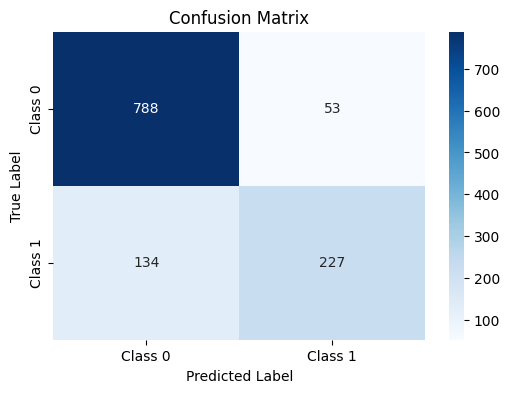

In [29]:

#make prediction
y_pred = rf_model.predict(X_test)
# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [34]:
#predict on new data
# define the path to the joiner Data excel file
file_path = r"D:\churn\prediction data.xlsx"

#define the sheet name to read the data from
sheet_name = 'vw_joinData'

#read the data from the specified sheet into a pandas Dataframe
new_data = pd.read_excel(file_path, sheet_name = sheet_name)

#display the first few rows of the fetched data
print(new_data.head())


  Customer_ID  Gender  Age  Married           State  Number_of_Referrals  \
0   93520-GUJ  Female   67    False         Gujarat                   13   
1   57256-BIH  Female   18    False           Bihar                    9   
2   72357-MAD  Female   53    False  Madhya Pradesh                   14   
3   66612-KAR  Female   58     True       Karnataka                   11   
4   22119-WES    Male   31     True     West Bengal                    5   

   Tenure_in_Months Value_Deal  Phone_Service  Multiple_Lines  ...  \
0                19     Deal 5           True            True  ...   
1                 7        NaN           True           False  ...   
2                12     Deal 5           True           False  ...   
3                18        NaN           True           False  ...   
4                 5        NaN           True           False  ...   

    Payment_Method Monthly_Charge  Total_Charges  Total_Refunds  \
0  Bank Withdrawal      72.099998      72.099998       

In [35]:

#retain the original dataframe to preserve unencoded Dataframe
original_data = new_data.copy()

#retain the customer_id column
customer_IDs = new_data['Customer_ID']




In [45]:
# Drop unwanted columns
columns_to_drop = ['Customer_ID', 'Customer_Status', 'Churn_Category', 'Churn_Reason', 'Value_Deal']
new_data = new_data.drop([col for col in columns_to_drop if col in new_data.columns], axis=1)

# Align indexes to prevent mismatches
new_data = new_data.reindex(original_data.index)

# Encode categorical variables using saved label encoders
for column in new_data.select_dtypes(include=['object']).columns:
    if column in label_encoders:
        new_data[column] = label_encoders[column].transform(new_data[column])
    else:
        print(f"Column '{column}' not found in label_encoders. Skipping...")

# Make predictions
new_predictions = rf_model.predict(new_data)

# Map predictions back to original DataFrame
original_data['Customer_Status_Predicted'] = None
original_data.loc[new_data.index, 'Customer_Status_Predicted'] = new_predictions

# Filter rows where predictions indicate churn
filtered_data = original_data[original_data['Customer_Status_Predicted'] == 1]

# Save the results
filtered_data.to_csv(r"D:\churn\saved.csv", index=False)
